<a href="https://colab.research.google.com/github/AlvarezTolosa/Repositorio-IA3/blob/main/Sea_Ice_Extent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Climate Change and Sea Ice Extent

We want to answer the question: Has there been a decrease in the amount of ice in the last years?

For that we will use the sea ice extent measurements (in millions of square km) from the [National Snow & Ice Data Center](https://nsidc.org).

We perform the following processing steps:
1. Read and clean the data.
2. Normalize the Sea Ice Extent (SIE) data and visualize its temporal trend.
3. Compute the SIE temporal trend as a simple linear regression (OLS) and quantitatively evaluate it.
4. Estimate the sea ice extent for 2025.


### 1. Read and clean the data.
Load the monthly sea ice extent (SIE) monthly data provided in the file 'SeaIce.txt'. Note variables ``extent`` (SIE) and ``area`` should be greater or equal than zero. Detect possible outliers and clean the data.  

In [ ]:
#your solution here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# al no estar tabulados los datos, se usa esta instrucción
data = pd.read_table('files/SeaIce.txt',delim_whitespace=True)
print(data.head())
print(len(data))
data=data[data.area>0]
print(data.head())
print(len(data))


   year  mo data_type region  extent   area
0  1979   1   Goddard      N   15.54  12.33
1  1980   1   Goddard      N   14.96  11.85
2  1981   1   Goddard      N   15.03  11.82
3  1982   1   Goddard      N   15.26  12.11
4  1983   1   Goddard      N   15.10  11.92
424
   year  mo data_type region  extent   area
0  1979   1   Goddard      N   15.54  12.33
1  1980   1   Goddard      N   14.96  11.85
2  1981   1   Goddard      N   15.03  11.82
3  1982   1   Goddard      N   15.26  12.11
4  1983   1   Goddard      N   15.10  11.92
422


### 2. Normalize the SIE data and visualize its temporal trend.

Visualize there is a monthly dependence of SIE, explore the linear relationship using ``lmplot``.
Compute the mean and variance of SIE for each month.

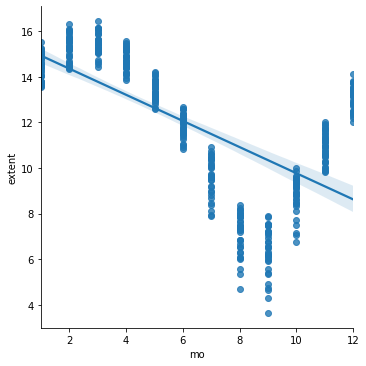

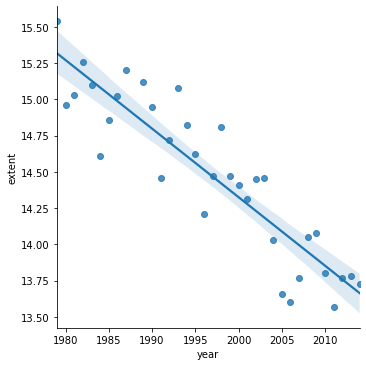

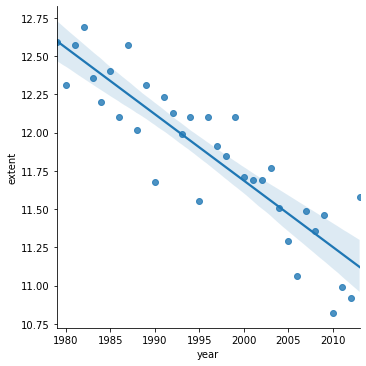

In [ ]:
#your response here
import seaborn as sns 

sns.lmplot(x='mo',y='extent',
           #hue='year',
           data=data)

datamo1=data[data.mo==1]
sns.lmplot(x='year',y='extent',
           data=datamo1)
datamo6=data[data.mo==6]
sns.lmplot(x='year',y='extent',
           data=datamo6)


    

In [ ]:
i=1
while i<13:
    
    print('Media mes',i,'=',data[data.mo==i].extent.mean())
    i=i+1

Media mes 1 = 14.479428571428572
Media mes 2 = 15.298888888888891
Media mes 3 = 15.491714285714284
Media mes 4 = 14.766000000000002
Media mes 5 = 13.396000000000003
Media mes 6 = 11.86
Media mes 7 = 9.601142857142861
Media mes 8 = 7.1222857142857166
Media mes 9 = 6.404857142857143
Media mes 10 = 8.809142857142856
Media mes 11 = 10.964722222222223
Media mes 12 = 13.059428571428569


In [ ]:
i=1
while i<13:
    
    print('Varianza mes',i,'=',data[data.mo==i].extent.var())
    i=i+1

Varianza mes 1 = 0.30490554621848714
Varianza mes 2 = 0.2958044444444444
Varianza mes 3 = 0.23720873949579804
Varianza mes 4 = 0.21537764705882365
Varianza mes 5 = 0.18990117647058827
Varianza mes 6 = 0.24791764705882358
Varianza mes 7 = 0.6791751260504203
Varianza mes 8 = 0.8245769747899159
Varianza mes 9 = 1.1439021848739497
Varianza mes 10 = 0.6303610084033615
Varianza mes 11 = 0.4125113492063492
Varianza mes 12 = 0.2848702521008402


Normalize the SIE data: subtract the monthly mean and then convert to percent difference by dividing by the monthly mean and then multiplying by 100. Use the normalized SIE for the rest of the exercise.

In [ ]:
#int(data.loc[:,'year'])

#data.year.to_numpy()
#print(data2.loc[10,'year'])
#print(newdata.loc[33,'year'])

In [ ]:
i=1
j=0

data.to_csv('newdata.csv',sep=";", decimal='.',index=False)
data2=pd.read_csv('newdata.csv',sep=";", decimal='.')
newdata=pd.read_csv('newdata.csv',sep=";", decimal='.')
media=data[data.mo==i].extent.mean()

print(data.head())
print(media)
#data2.loc[j,'extent']=((data.loc[j,'extent']-media)/media)*100
#data2.loc[j,'extent']
#data.loc[44,'mo']


   year  mo data_type region  extent   area
0  1979   1   Goddard      N   15.54  12.33
1  1980   1   Goddard      N   14.96  11.85
2  1981   1   Goddard      N   15.03  11.82
3  1982   1   Goddard      N   15.26  12.11
4  1983   1   Goddard      N   15.10  11.92
14.479428571428572


In [ ]:
#your response here
#print(data.head())
i=1
j=0
print(len(newdata))
# data2=data.copy() OJO CON ESTA INSTRUCCIÓN, en una columna de datos tipo INT, metía datos tipo FLOAT a partir de la muestra 8
while i<13:     
    media=newdata[newdata.mo==i].extent.mean()
    print('i=',i,'media=',media)
    while newdata.loc[j,'mo'] == i: 
        
        data2.loc[j,'extent']=((newdata.loc[j,'extent']-media)/media)*100
        print('j=',j,data2.loc[j,'year'],newdata.loc[j,'year'],data2.loc[j,'extent'],newdata.loc[j,'extent'])
        j=j+1
        if j == len(newdata):
            break
    i=i+1
    
print(data2.head())

422
i= 1 media= 14.479428571428572
j= 0 1979 1979 7.324677374797729 15.54
j= 1 1980 1980 3.318994435455226 14.96
j= 2 1981 1981 3.802438928134485 15.03
j= 3 1982 1982 5.390899404080658 15.26
j= 4 1983 1983 4.2858834208137555 15.1
j= 5 1984 1984 0.9017719720588707 14.61
j= 6 1985 1985 2.6283594459134028 14.86
j= 7 1986 1986 3.733375429180305 15.02
j= 8 1987 1987 4.976518410355566 15.2
j= 9 1989 1989 4.424010418722115 15.12
j= 10 1990 1990 3.249930936501034 14.95
j= 11 1991 1991 -0.13418051225383895 14.46
j= 12 1992 1992 1.6614704605548734 14.72
j= 13 1993 1993 4.147756422905395 15.08
j= 14 1994 1994 2.352105450096684 14.82
j= 15 1995 1995 0.9708354710130506 14.62
j= 16 1996 1996 -1.8607679861083712 14.21
j= 17 1997 1997 -0.06511701329965912 14.47
j= 18 1998 1998 2.2830419511425037 14.81
j= 19 1999 1999 -0.06511701329965912 14.47
j= 20 2000 2000 -0.4794980070247503 14.41
j= 21 2001 2001 -1.1701329965665608 14.31
j= 22 2002 2002 -0.20324401120803104 14.45
j= 23 2003 2003 -0.13418051225383

j= 217 1985 1985 5.091655755267187 10.09
j= 218 1986 1986 9.049517914533947 10.47
j= 219 1987 1987 3.945958814426817 9.98
j= 220 1988 1988 4.570884418521555 10.04
j= 221 1989 1989 8.112129508391822 10.38
j= 222 1990 1990 0.19640518985830205 9.62
j= 223 1991 1991 0.8213307939530576 9.68
j= 224 1992 1992 10.507677657421684 10.61
j= 225 1993 1993 0.6130222592548119 9.66
j= 226 1994 1994 6.44566123080582 10.22
j= 227 1995 1995 -4.698845375550564 9.15
j= 228 1996 1996 7.903820973693559 10.36
j= 229 1997 1997 -0.11605761218906646 9.59
j= 230 1998 1998 0.19640518985830205 9.62
j= 231 1999 1999 -0.11605761218906646 9.59
j= 232 2000 2000 1.550410665396936 9.75
j= 233 2001 2001 -3.9697655041066855 9.22
j= 234 2002 2002 -1.1576002856803134 9.49
j= 235 2003 2003 -1.470063087727682 9.46
j= 236 2004 2004 -0.011903344839943628 9.6
j= 237 2005 2005 -6.9902392572313214 8.93
j= 238 2006 2006 -9.698250208308572 8.67
j= 239 2007 2007 -15.322580645161315 8.13
j= 240 2008 2008 -6.365313653136566 8.99
j= 241

Visualize the trend of SIE per year considering:1) all months, 2) January, 3) August

Text(0.5, 0, 'month')

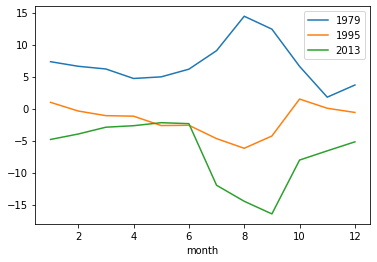

In [ ]:
#your response here
x=data2[data2.year==1979].mo
y1979=data2[data2.year==1979].extent
y1995=data2[data2.year==1995].extent
y2013=data2[data2.year==2013].extent
##################################
plt.plot(x,y1979,label='1979')
plt.plot(x,y1995,label='1995')
plt.plot(x,y2013,label='2013')
plt.legend()
plt.xlabel('month')

In [ ]:
data2[data2.year==2013].extent

33     -4.830498
69     -3.979955
105    -2.915844
140    -2.681837
175    -2.209615
210    -2.360877
245   -11.989644
280   -14.493742
315   -16.469644
350    -8.050078
386    -6.609581
421    -5.202590
Name: extent, dtype: float64

##### Vemos que 2013 está muy por debajo de la media, y aún mas en los meses de verano. Con esto interpreto que los veranos están siendo más cálidos

In [ ]:
### Y aquí vemos la evolución, 

Text(0.5, 0, 'year')

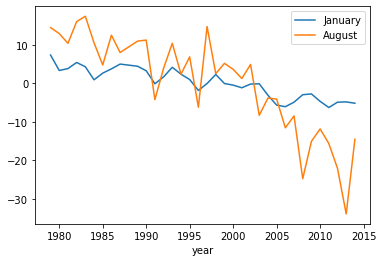

In [ ]:
x=data2[data2.mo==1].year
yJanuary=data2[data2.mo==1].extent
yAugust=data2[data2.mo==8].extent

plt.plot(x,yJanuary,label='January')
plt.plot(x,yAugust,label='August')
plt.legend()
plt.xlabel('year')

Calculate the Pearson correlation coefficient and the p-value for testing non-correlation of the SIE temporal trend (consider all months). Is it significant?

In [ ]:
#your response here

### 3. Compute the trend as a simple linear regression (OLS) and quantitatively evaluate it.

Provide the estimated parameters for the linear regression. 
Evaluate the quality of fit quantitatively and graphically.

In [ ]:
#your solution here

### 4. Estimate the sea ice extent for January 2025

 Is there a negative trend in the evolution of sea ice extent over recent years? 

In [ ]:
#your solution here